In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df = pd.read_excel('Real estate valuation data set.xlsx', engine='openpyxl')
df = df.iloc[:, 1:] 

In [28]:
print(df.head())

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0          2012.916667          32.0                                84.87882   
1          2012.916667          19.5                               306.59470   
2          2013.583333          13.3                               561.98450   
3          2013.500000          13.3                               561.98450   
4          2012.833333           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


In [29]:
print(df.describe())
print(df.info())
print(+df.isnull().sum())  # verificar dados faltantes


       X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148953     17.712560   
std               0.281995     11.392485   
min            2012.666667      0.000000   
25%            2012.916667      9.025000   
50%            2013.166667     16.100000   
75%            2013.416667     28.150000   
max            2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                   

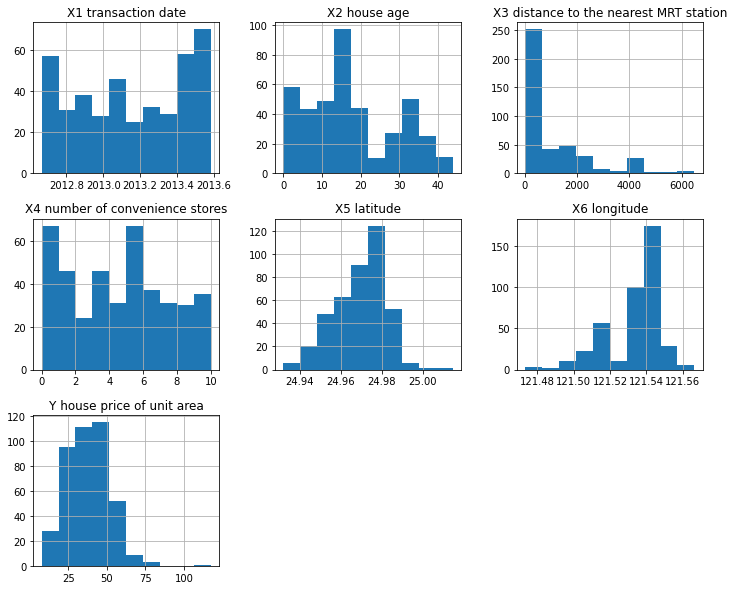

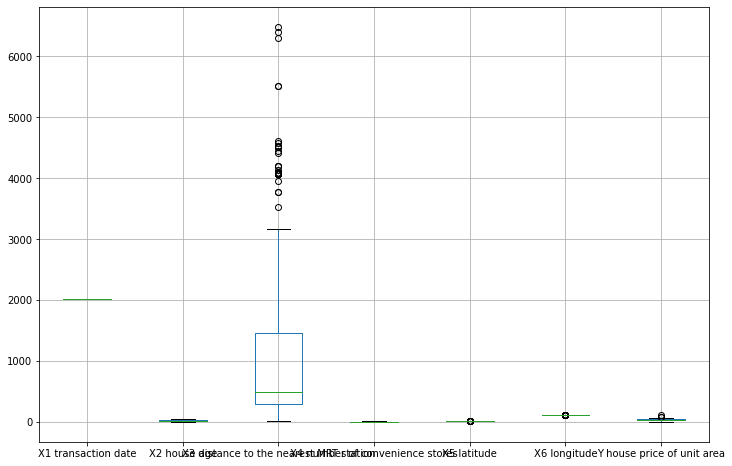

In [ ]:
#Distribuição das variáveis
df.hist(figsize=(12,10))
plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

def normalizar_dados_treino_teste(X_train, X_test, metodo='none'):
    """
    Normaliza dados de treino e teste, calculando parâmetros só no treino.
    :param X_train: features treino (DataFrame ou array)
    :param X_test: features teste (DataFrame ou array)
    :param metodo: método de normalização ('none', 'zscore', 'minmax_0_1', 'minmax_-1_1')
    :return: X_train_norm, X_test_norm (arrays numpy)
    """
    if metodo == 'none':
        return X_train.values, X_test.values
    elif metodo == 'zscore':
        scaler = StandardScaler()
    elif metodo == 'minmax_0_1':
        scaler = MinMaxScaler(feature_range=(0, 1))
    elif metodo == 'minmax_-1_1':
        scaler = MinMaxScaler(feature_range=(-1, 1))
    else:
        raise ValueError(f"Método '{metodo}' não suportado.")

    # Ajustar somente nos dados de treino
    scaler.fit(X_train)
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    return X_train_norm, X_test_norm

In [55]:
# Definição das variáveis
X = df.drop(['Y house price of unit area'], axis=1)
y = df['Y house price of unit area']

# Divisão dos dados em treino e teste primeiro
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)

# Normalização após divisão
metodo_normalizacao = 'zscore'  # escolher método : 'minmax_-1_1' 'minmax_0_1' 'zscore' 'none'
X_train_norm, X_test_norm = normalizar_dados_treino_teste(X_train, X_test, metodo=metodo_normalizacao)
#print(X_train_norm)

# Treinar modelo
model = LinearRegression()
model.fit(X_train_norm, y_train)

# Prever e avaliar
y_pred = model.predict(X_test_norm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Método de normalização: {metodo_normalizacao}')
print(f'RMSE: {rmse:.3f}')
print(f'R2: {r2:.3f}')

Método de normalização: zscore
RMSE: 7.315
R2: 0.681


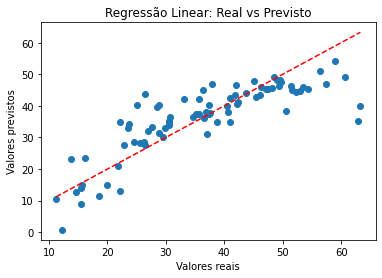

In [54]:
# 8. Visualizar resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Regressão Linear: Real vs Previsto')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()